In [5]:
import configparser
import json
import matplotlib.pyplot as plt

Capturando as configurações dos gráficos e resultados de previsões

In [6]:
configs = configparser.ConfigParser()
configs.read('../../configuracoes_graficos.conf')
values = []
for key,value in configs.items("CESTA_BASICA"):
    values.append(value)

qtd_meses = int(values[0])
meses_previstos = values[1].split(',')
meses_previstos = [mes.strip() for mes in meses_previstos]
meses_anteriores = values[2].split(',')
meses_anteriores = [mes.strip() for mes in meses_anteriores]

valores_reais_ilheus = values[3]
valores_reais_ilheus = valores_reais_ilheus.replace('[','')
valores_reais_ilheus = valores_reais_ilheus.replace(']','')
valores_reais_ilheus = valores_reais_ilheus.split(',')
valores_reais_ilheus = [float(valor) for valor in valores_reais_ilheus]

valores_reais_itabuna = values[4]
valores_reais_itabuna = valores_reais_itabuna.replace('[','')
valores_reais_itabuna = valores_reais_itabuna.replace(']','')
valores_reais_itabuna = valores_reais_itabuna.split(',')
valores_reais_itabuna = [float(valor) for valor in valores_reais_itabuna]

eixo_y_limite_sup = int(values[5]) + 1
eixo_y_limite_inf = int(values[6])
eixo_y_varia_em = int(values[7])

ano_previsao = int(values[8])

modelo = values[9]

erros = ["A quantidade de meses previstos passados deve ser igual ao número atribuiído em qtd_meses_previstos",
          "A quantidade de meses anteriores passados deve ser igual a 12 - meses previstos.",
          "A quantidade de valores dos meses anteriores deve ser igual ao dos nomes dos meses"]

assert len(meses_previstos) == qtd_meses, erros[0]
assert len(meses_anteriores) == 12-qtd_meses, erros[1]
assert len(valores_reais_ilheus) == len(meses_anteriores), erros[2]

Capturando os resultados das previsões

In [7]:
resultados = {'ilheus':[], 'itabuna':[]}
cidades = [r'ilheus', r'itabuna']

for cidade in cidades:
    path = f"../../output/previsoes_cesta/previsao_{modelo}_cesta_basica_{cidade}.json"
    with open(path,'r') as file:
        resultado = json.load(file)
        resultado['cesta_basica'] = resultado['cesta_basica'].replace("[", "")
        resultado['cesta_basica'] = resultado['cesta_basica'].replace("]", "")
        temp = resultado['cesta_basica'].split(',')
        for valor in temp:
            resultados[cidade].append(float(valor) * 1000)

Plotando os gráficos

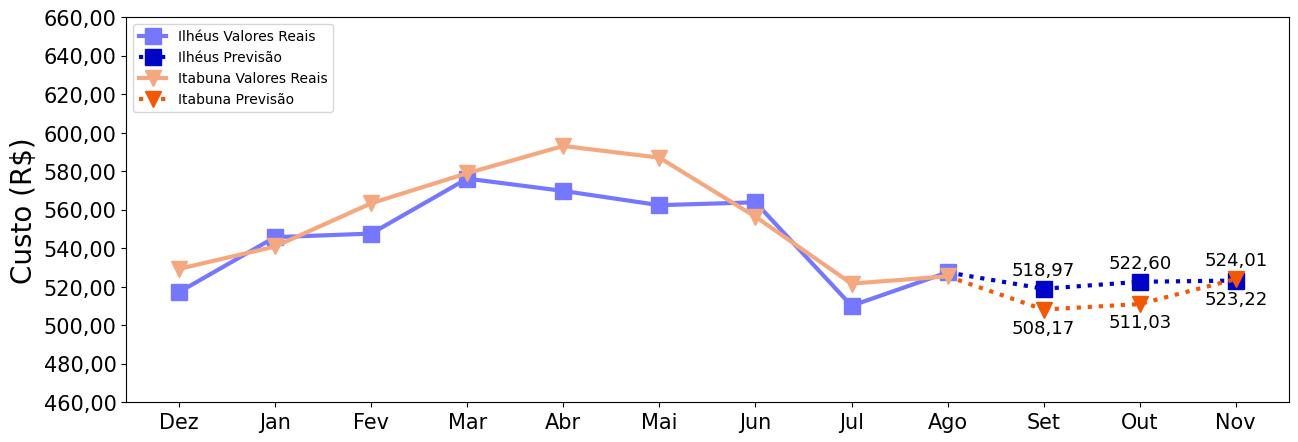

In [8]:
line_size = 3
marker_size = 12
marks = ['s', 'v']
x_label = meses_anteriores + meses_previstos
y_hats = {'ilheus': resultados['ilheus'], 'itabuna': resultados['itabuna']}
real_values = {'ilheus': valores_reais_ilheus, 'itabuna': valores_reais_itabuna}
colors_real = ['#7578ff', '#f5a87f']
colors_previsao = ['#0004c7', '#f25705']
labels_real = ['Ilhéus Valores Reais', 'Itabuna Valores Reais']
labels_previsao = ['Ilhéus Previsão', 'Itabuna Previsão']
legendas = [real_values['ilheus'] + [round(y,2) for y in y_hats['ilheus']],
            real_values['itabuna'] + [round(y,2) for y in y_hats['itabuna']]]

plt.figure(figsize=(15, 5))
for i, cidade in enumerate(['ilheus', 'itabuna']):
    plt.plot([8, 9], [real_values[cidade][-1], y_hats[cidade][0]], ':', color=colors_previsao[i],
             lw=line_size, markersize=marker_size)

    plt.plot([x for x in range(9)], real_values[cidade], marker=marks[i], label=labels_real[i],
             color=colors_real[i], lw=line_size, markersize=marker_size)

    plt.plot([9,10,11], y_hats[cidade], ":" , marker=marks[i], label=labels_previsao[i], color=colors_previsao[i],
             lw=line_size, markersize=marker_size)

    for j in range(9, 12):
        if cidade == "ilheus":
            if legendas[0][j] >= legendas[1][j]: # Verifica se o preço da cesta básica de Ilhéus é maior
                plt.annotate(format(legendas[i][j], ".2f").replace(".",","), (j, legendas[i][j]+5), size=13,
                    va='bottom', ha= 'center')
            else:
                plt.annotate(format(legendas[i][j], ".2f").replace(".",","), (j, legendas[i][j]-5), size=13,
                    va='top', ha= 'center')
        else:
            if legendas[1][j] >= legendas[0][j]:
                plt.annotate(format(legendas[i][j], ".2f").replace(".",","), (j, legendas[i][j]+5), size=13,
                    va='bottom', ha= 'center')
            else:
                plt.annotate(format(legendas[i][j], ".2f").replace(".",","), (j, legendas[i][j]-5), size=13,
                    va='top', ha= 'center')

plt.xticks([x for x in range(0,12)],x_label,size=15)
plt.ylabel("Custo (R$)",size=20)
plt.yticks([y for y in range(eixo_y_limite_inf,eixo_y_limite_sup,eixo_y_varia_em)],
           [format(y,".2f").replace(".",",") for y in range(eixo_y_limite_inf, eixo_y_limite_sup, eixo_y_varia_em)],
           size=15)
plt.legend(loc=2)

chart_name = f'../../output/figure/previsao_cestaBasica_{meses_previstos[0]}-{meses_previstos[2]}_{ano_previsao}.png'
plt.savefig(fname=chart_name)

plt.show()